# Census Project Code - Okwuchi Anyanwu - 202250228

## Import all Useful Packages

In [1]:
#importing all useful python libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from ydata_profiling import ProfileReport
import statistics

## Read in the Data Set (Census Data 06)

In [2]:
# Read in csv file into a pandas dataframe

census_dataFrame = pd.read_csv("census06.csv")
census_df = census_dataFrame.copy()        # make a copy of the original data set to main its originality

In [3]:
census_df.head()    # read the header (columns and first 5 rows of the data set),Try to get insight of the structure of the data set

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None


In [4]:
census_df.shape     # checking the number of rows and columns
                    # it can be observed that the data set has 8329 rows and 11 coulmns

(8329, 11)

### Checking for duplicates

In [5]:
# checcking for duplicated rows in the data set

census_df.duplicated()
census_df.loc[census_df.duplicated()].sum() # no duplicated rows

House Number                     0.0
Street                           0.0
First Name                       0.0
Surname                          0.0
Age                              0.0
Relationship to Head of House    0.0
Marital Status                   0.0
Gender                           0.0
Occupation                       0.0
Infirmity                        0.0
Religion                         0.0
dtype: float64

### Raw Data Structure and Features

In [6]:
census_df.info()     # dataframe information for deeper insight of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


In [7]:
census_df.dtypes   #checking the type of class of entries to have a better understanding of the data set
                   # it can be observed that the data type for age is object instead of integer type,
                   # this implies the could be some errors in some entries in that data column
                   # it smart to have a look at each unique entries in the age column to under why is an the data type is object    

House Number                      int64
Street                           object
First Name                       object
Surname                          object
Age                              object
Relationship to Head of House    object
Marital Status                   object
Gender                           object
Occupation                       object
Infirmity                        object
Religion                         object
dtype: object

In [8]:
census_df.isna().sum()

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2056
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2105
dtype: int64

In [9]:
print(census_df["Age"].unique())  # checking the unique types in the Age data column
                                  # to understand why the type is object and not integer
                                  # now it can be obseved that the entries are floats and interger

['50' '52' '69' '72' '36' '42' '38' '7' '29' '32' '62' '80' '56' '55' '25'
 '17' '63' '23' '22' '39' '41' '2' '1' '67' '65' '28' '27' '5' '4' '3'
 '20' '19' '49' '83.71794888354226' '14.0' '66' '82' '83' '44' '15' '21'
 '46' '45' '43' '64' '59' '34' '10' '9' '35' '0' '68' '48' '16' '81' '53'
 '8' '40' '51' '54' '58' '13' '61' '26' '47' '74' '79' '75' '70' '71'
 '102' '73' '24' '60' '30' '33' '11' '31' '61.61015620160364'
 '62.61015620160364' '15.0' '10.0' '18' '37' '12' '14' '6' '57' '89' '85'
 '78' '88' '91' '93' '97' '86' '77' '50.03241969022402'
 '51.03241969022402' '1.0' '90' '76' '104' '84' ' ' '92' '87' '95' '98'
 '105' '48.65904417229777' '50.65904417229777' '12.0' '54.55812337483672'
 '57.55812337483672' '3.0' '0.0' '106' '65.90982310589523'
 '68.90982310589523' '16.0' '94' '101' '99' '49.62636495189123'
 '53.62636495189123' '5.0']


In [10]:
census_df.replace(' ', np.nan, inplace = True)  # is observed that some of the entries in the age column has empty string object
                                                # these empty entries might also be present in some other columns in the data set.
                                                # so is best to replace all empty string to NaN, so that it can reflect when it been checked using ".isnan"

In [11]:
census_df.isna().sum()

House Number                        0
Street                              0
First Name                          1
Surname                             1
Age                                 2
Relationship to Head of House       0
Marital Status                   2059
Gender                              0
Occupation                          0
Infirmity                           8
Religion                         2109
dtype: int64

### General profile of the Raw Data

In [13]:
census_raw_data = ProfileReport(census_df, title= "Pandas Profile Report", explorative=True)

In [14]:
census_raw_data

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Cleaning each Column of the Data Set
### Cleaning the Surname Name and First Name Column

In [15]:
# checking the row with the missing first Name and Surname

census_df.loc[census_df["First Name"].isna() | census_df["Surname"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


In [16]:
census_df.loc[(census_df["House Number"] == 10) & (census_df["Street"] == "Thomas Drive")] # checkimg the entire house no to get the relations into the fill the surname appriopiately
                                                                                            # from the house number and street name it can be observed that missing surname is Taylor's husband

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,NaN,Taylor,59,Head,Married,Male,Health and safety adviser,None,None
7259,10,Thomas Drive,Kerry,Taylor,57,Wife,Married,Female,"Pilot, airline",None,None


In [17]:
census_df["First Name"].fillna("Kerry Taylor's husband", inplace = True)   # hense is replaced with Taylor's husband"

In [18]:
census_df.loc[(census_df["House Number"] == 5) & (census_df["Street"] == "Gill Mews")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,NaN,8,Son,NaN,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,NaN,Male,Student,None,NaN


In [19]:
census_df["Surname"].fillna("Adams", inplace = True)   # hense is logical to replaced the mssing First namae with "Adams"

In [20]:
# code validation
census_df.loc[census_df["First Name"].isna() | census_df["Surname"].isna()] # comfirming that missing entries in surname and First name have been filled

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Cleaning the Age Column

In [21]:
print(census_df["Age"].unique())    # checking the unique types in the Age data column
                                    # to understand why the type is object and not integer
                                    # now it can be obseved that the entries are floats and intergers

['50' '52' '69' '72' '36' '42' '38' '7' '29' '32' '62' '80' '56' '55' '25'
 '17' '63' '23' '22' '39' '41' '2' '1' '67' '65' '28' '27' '5' '4' '3'
 '20' '19' '49' '83.71794888354226' '14.0' '66' '82' '83' '44' '15' '21'
 '46' '45' '43' '64' '59' '34' '10' '9' '35' '0' '68' '48' '16' '81' '53'
 '8' '40' '51' '54' '58' '13' '61' '26' '47' '74' '79' '75' '70' '71'
 '102' '73' '24' '60' '30' '33' '11' '31' '61.61015620160364'
 '62.61015620160364' '15.0' '10.0' '18' '37' '12' '14' '6' '57' '89' '85'
 '78' '88' '91' '93' '97' '86' '77' '50.03241969022402'
 '51.03241969022402' '1.0' '90' '76' '104' '84' nan '92' '87' '95' '98'
 '105' '48.65904417229777' '50.65904417229777' '12.0' '54.55812337483672'
 '57.55812337483672' '3.0' '0.0' '106' '65.90982310589523'
 '68.90982310589523' '16.0' '94' '101' '99' '49.62636495189123'
 '53.62636495189123' '5.0']


In [22]:
census_df.Age.isna().sum()  # checkimg for missing values in Age column

2

In [23]:
census_df.loc[census_df["Age"].isna()]  # checking the unique types in the Age data column
                                        # to understand why the type is object and not integer
                                        # now it can be obseved that the entries are floats and intergers

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,NaN,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,NaN,Son,Single,Male,University Student,None,Christian


In [24]:
# Checking for the mode of the university student age

(census_df[census_df.Occupation == "University Student"]).Age.mode()

0    19
dtype: object

In [25]:
# Since the mode Age above is (19years) is logically to replace the NaN entry for "Hugh Richards" using the coorection between Relationship to head of house and Occupation.

census_df.loc[(census_df["Age"].isna()) & (census_df["Relationship to Head of House"] == "Son" ), "Age"] = 19

In [26]:
# Replacing the row for "Christopher Johnson" using same approach as the previous
# checking the mode for persons whoes Relationship to Head of House is husband

census_df.loc[census_df["Relationship to Head of House"] == "Husband"].Age.mode()    

0    48
dtype: object

In [27]:
census_df.loc[(census_df["Age"].isna()) & (census_df["Relationship to Head of House"] == "Husband" ), "Age"] = 48

In [28]:
# Code validation (confirming that the NaN entries have beemn replaced with the median value of the Age)

census_df.Age.isna().sum()

0

In [29]:
census_df["Age"] = census_df["Age"].astype(float) # converting the data type of the Age column from object type to float

In [30]:
census_df["Age"] = census_df["Age"].astype(int) # converting the data type of the Age column from float type to int type

In [31]:
# Code validation of the new dtype of the Age column

print(census_df["Age"])

0       50
1       52
2       69
3       72
4       36
        ..
8324    56
8325    43
8326    43
8327     0
8328    24
Name: Age, Length: 8329, dtype: int32


#### Checking for outliers and wrong entries in the age column

In [32]:
census_df.loc[census_df.Age < 0] #checking for incorrect age inputs with negative values

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [33]:
census_df.Age.describe().transpose()     # Checking for age distribution and possible outliars

count    8329.000000
mean       35.292112
std        21.375132
min         0.000000
25%        18.000000
50%        35.000000
75%        50.000000
max       106.000000
Name: Age, dtype: float64

In [34]:
census_df.loc[census_df["Age"] > 90]    # checking for outlier, it shows that some peaople are above 90 yeras,
                                        # the age can be said to be correct, as it can be seen that most of the persons above 90years are either retired or unemployed
                                        # also there relationship to head of house either husband or head

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
145,17,Zebra Lodge,Josh,Morton,102,Head,Divorced,Male,Retired Purchasing manager,None,Catholic
562,49,Peninsula Drive,Conor,Walsh,91,Husband,Married,Male,Unemployed,None,Christian
620,8,Wessex Drive,Jacqueline,Whittaker,93,Head,Married,Female,Retired Aeronautical engineer,None,Christian
621,8,Wessex Drive,Cameron,Whittaker,97,Husband,Married,Male,Retired Food technologist,None,None
1054,120,Wessex Drive,Stuart,Gilbert,93,Husband,Married,Male,Retired Insurance risk surveyor,None,None
1464,20,Sheppard Way,Eileen,Harris,104,Head,Widowed,Female,Retired Cartographer,None,None
2027,12,Spencer Keys,Malcolm,Bird,91,Husband,Married,Male,Retired Scientific laboratory technician,None,Christian
2223,22,Andrews Mill,Alan,Blackburn,92,Husband,Married,Male,Retired Neurosurgeon,None,Christian
2722,6,Dale Road,Benjamin,Young,92,Head,Widowed,Male,Retired Solicitor,None,Methodist
3093,47,Riley Avenue,Karl,Gray,95,Head,Widowed,Male,Retired Retail merchandiser,None,Christian


### Cleaning the Marital status column

In [35]:
census_df["Marital Status"].isna().sum() # checking for missing entries

2059

In [36]:
# checking for unique entries in the Marital Status Column

print(census_df["Marital Status"].unique())
print(census_df["Marital Status"].nunique())

['Single' 'Married' 'Divorced' nan 'Widowed']
4


In [37]:
census_df[["Age", "Marital Status"]].groupby("Marital Status").describe()   # Marital status by age distribution

Age                                                     
                 count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         744.0  40.983871  16.728044  18.0  28.0  39.0  50.0  102.0
Married         2225.0  50.314157  15.964853  16.0  38.0  49.0  62.0  106.0
Single          2941.0  37.703842  14.150756  18.0  25.0  37.0  48.0   97.0
Widowed          360.0  62.061111  20.374943  18.0  45.0  68.0  76.0  105.0

#### Correcting all NaN Entries of marital status

In [38]:
# checking for NaN value for people who are less thamn 18 years

census_df.loc[(census_df["Age"] < 18) & (census_df["Marital Status"].isna())] # it can be observed that most of the missing entries in the Marital statusa are minors(less than 18years)
                                                                                # so is logical to replace all rows with missng marital status, where Age is below 18 with "Not Applicable"

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,NaN,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,NaN,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,NaN,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,NaN,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,NaN,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,NaN,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,NaN,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,NaN,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,NaN,Male,Child,None,NaN


In [39]:
# replacing all missingentries below 18 years sicne thats is the legal age for marriage according to UK marriage laws

census_df.loc[(census_df["Age"] < 18  ) & (census_df["Marital Status"].isna()), "Marital Status"] = "Not Applicable"

In [40]:
# code validation
# checking for the remaining missing entries in the Marital Satutus column

census_df.loc[census_df["Marital Status"].isna()]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [41]:
# it can be seen that Lynn Hilton relationship to head of house is head'
# so is logical to assume that Lynn Hilton is married to Adrain Hilton,
# hense we replace the marrital status with Married

census_df.loc[(census_df["House Number"] == 53) & (census_df["Street"] == 'Smith Plains')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,NaN,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian
4331,53,Smith Plains,Richard,Hilton,27,Son,Single,Male,Barrister's clerk,None,Christian
4332,53,Smith Plains,Jean,Hilton,16,Daughter,Not Applicable,Female,Student,None,NaN


In [42]:
# hense is logical to replace the marrital status with Married

census_df.loc[(census_df["Age"] == 52 ) & (census_df["Marital Status"].isna()), "Marital Status"] = "Married" 

In [43]:
# using house number and street name to correctate the marital status of "Susan Taylor"

census_df.loc[(census_df["House Number"] == 24) & (census_df["Street"] == 'Ellis Mountain')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7102,24,Ellis Mountain,Andrew,Jennings,59,Head,Single,Male,"Civil engineer, consulting",None,None
7103,24,Ellis Mountain,Susan,Taylor,19,None,NaN,Female,University Student,None,Christian


In [44]:
# it can be obervsed it only two persons living in the house
# and the are not beering sane Surname, and also the head is single.
# also Susan Taylor is a University student, and must Unversity students are Single
# with all these observations it logical to replace her Marital status as Single 

census_df.loc[(census_df["Age"] == 19 ) & (census_df["Marital Status"].isna()), "Marital Status"] = "Single" 

In [45]:
# using house number and street name to correctate the marital status of "Adrian King"
census_df.loc[(census_df["House Number"] == 30) & (census_df["Street"] == 'Freeman Trail')] 

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7458,30,Freeman Trail,Eleanor,Simpson,19,Head,Single,Female,University Student,None,None
7459,30,Freeman Trail,Thomas,Ball,22,None,Single,Male,University Student,None,Catholic
7460,30,Freeman Trail,Adrian,King,20,None,NaN,Male,University Student,None,Christian


In [47]:
# since they other occupants are all University studentd, within same age range and all single, 
# so is logical to assume Adrian King is also Single

census_df.loc[(census_df["Occupation"] == "University Student" ) & (census_df["Marital Status"].isna()), "Marital Status"] = "Single"

In [48]:
# code validation, comfirming that all the missing values uin Age column have been fixed

census_df["Marital Status"].isna().sum()

0

#### Checking for Outliers, rows with abnormal marital status entries

[Text(0.5, 1.0, 'Marital Status Against Age Distribution')]

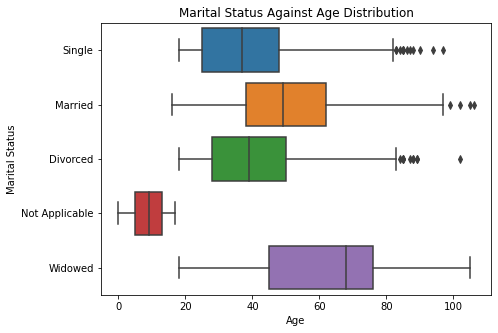

In [49]:
plt.figure(figsize=(7,5))
sns.boxplot(y= "Marital Status", x= "Age", data= census_df).set(title= "Marital Status Against Age Distribution")

In [50]:
# checking for people below 18years and are Divorced

census_df.loc[(census_df["Age"] < 18) & (census_df["Marital Status"] == "Divorced")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [51]:
# checking for people below 18years and are Widowed

census_df.loc[(census_df["Age"] < 18) & (census_df["Marital Status"] == "Widowed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


### Cleaning the Gender Column

In [52]:
print(census_df["Gender"].nunique()) # checking the uniques values in the gender column
print(census_df["Gender"].unique())  # entries are correct, so there is nothing to change

2
['Female' 'Male']


### Cleaning the Infirmity Column

In [53]:
# checkin the numbers of missing entries in Infirmity column

census_df["Infirmity"].isna().sum()

8

In [54]:
# checking the uniques values in the infirmity column

print(census_df["Infirmity"].nunique()) 
print(census_df["Infirmity"].unique())

7
['None' 'Physical Disability' 'Mental Disability' 'Unknown Infection' nan
 'Disabled' 'Blind' 'Deaf']


#### Replacing all NaN in Infirmity

In [55]:
# since we can not logically correlate the missing entries with any of the other comlumns and also the number is relatively small,
# hence is more practical to replace the missing entries with Unkown

census_df["Infirmity"].fillna("Unspicified", inplace = True)

In [56]:
# Code vadildation

census_df["Infirmity"].isna().sum() 

0

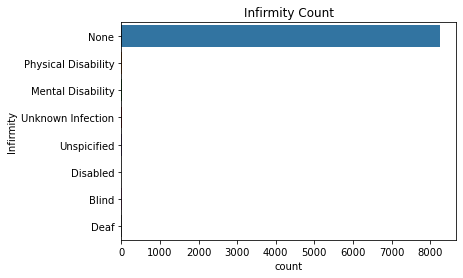

In [57]:
# Plot the infrimity value count

infirmity_plot = sns.countplot(y= "Infirmity", data= census_df).set(title= "Infirmity Count")
plt.savefig("Infrimity plot.png")
plt.show()

### Cleaning the Religion Column

In [58]:
# checking the uniques values in the Religion column
# this show that all spacified religion are correct and valid
# it can be assumed that most of the people did not lie or input incorrect religion, is just that they don't have any

print(census_df["Religion"].nunique())   
print(census_df["Religion"].unique())    
                                       

9
['Catholic' 'Methodist' 'None' nan 'Christian' 'Sikh' 'Muslim' 'Jewish'
 'Buddist' 'Quaker']


#### Correcting all NaN entries in Religion

In [59]:
census_df.loc[census_df["Religion"].isna()]  # checking for missing entries in re

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7,4,Scott Dale,Jamie,Akhtar,7,Son,Not Applicable,Male,Student,None,NaN
15,7,Scott Dale,Alex,O'Neill-Walker-Iqbal,17,Son,Not Applicable,Male,Student,None,NaN
22,9,Scott Dale,Rhys,Smith,7,Son,Not Applicable,Male,Student,None,NaN
23,9,Scott Dale,Max,Smith,2,Son,Not Applicable,Male,Child,None,NaN
24,9,Scott Dale,Stacey,Smith,1,Daughter,Not Applicable,Female,Child,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8310,1,Jones Barracks,Lydia,Stevenson,7,Daughter,Not Applicable,Female,Student,None,NaN
8311,1,Jones Barracks,Debra,Stevenson,4,Daughter,Not Applicable,Female,Child,None,NaN
8322,1,Walker Palace,Kenneth,Lane,3,Son,Not Applicable,Male,Child,None,NaN
8323,1,Walker Palace,Victor,Lane,0,Son,Not Applicable,Male,Child,None,NaN


In [60]:
# we can't assume that a minor's(Child below 18years) religion will be same as that of the parents
# checking through the data set, there is no correlation that is logically or legally justifiable,..
#...to replace the missing entries in the column for religion,...
#..hence is left as it is.

census_df["Religion"].fillna("Unknown", inplace = True)

In [61]:
census_df["Religion"].isna().sum()

0

### Cleaning the Occupation Column

In [62]:
# checking the total number of unique entries in the occupation column

print(census_df["Occupation"].nunique())
print(census_df["Occupation"].unique())

1058
['Engineer, building services' 'Engineer, mining' 'Unemployed' ...
 'Retired Multimedia programmer' 'Retired Commercial/residential surveyor'
 'Retired Control and instrumentation engineer']


#### Replacing all Age 65 Unemployed to Retired (UK.Pemsion Law)

In [63]:
#Checking for outliers and inncorect input
# People who are above 65yeasr whose Occupation are imputed as Unemployed
census_df.loc[(census_df["Age"] > 65) & (census_df["Occupation"] == "Unemployed")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
47,20,Scott Dale,Frances,Webb,80,Head,Single,Female,Unemployed,None,Christian
81,5,Lee Shoal,Katy,Burrows,82,Head,Widowed,Female,Unemployed,None,None
124,1,Zebra Lodge,Timothy,Taylor,83,Head,Divorced,Male,Unemployed,None,Christian
155,24,Zebra Lodge,Paula,Barber,67,Head,Widowed,Female,Unemployed,None,Christian
479,20,Peninsula Drive,Caroline,Robinson,67,Head,Married,Female,Unemployed,None,Christian
562,49,Peninsula Drive,Conor,Walsh,91,Husband,Married,Male,Unemployed,None,Christian
653,16,Wessex Drive,Kayleigh,Patel,67,Head,Widowed,Female,Unemployed,None,None
1098,133,Wessex Drive,Eileen,Kay,73,Head,Divorced,Female,Unemployed,None,Christian
1110,136,Wessex Drive,Marilyn,Green,66,Head,Widowed,Female,Unemployed,None,Jewish


In [64]:
# all the outliers with age above 65 and are imputed as unepmployed were covered to empolyed as this the official retirement age according to UK 

census_df.loc[(census_df["Occupation"] == "Unemployed") & (census_df.Age > 65), "Occupation"] = "Retired"

# Data Insight

In [65]:
census_profile = ProfileReport(census_df, title= "Pandas Profile Report", explorative=True)
census_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Detailed Data Exploration and Analysis

In [66]:
# new data features after cleaning the data

census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   int32 
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 8329 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       8329 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 683.4+ KB


## Age Correlations Analysis

### Plotting a histogram for male age and female age distribution

In [67]:
gender_counts = census_df['Gender'].value_counts()

In [68]:
print("Number of males:", gender_counts['Male'])

Number of males: 4027


In [69]:
print("Number of females:", gender_counts['Female'])

Number of females: 4302


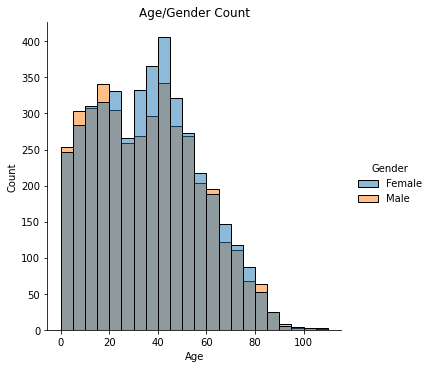

<Figure size 1440x360 with 0 Axes>

In [70]:
# relation between age and gender counts

Age_plot = sns.displot(census_df, x= "Age", hue= "Gender", binwidth= 5).set(title= "Age/Gender Count")
plt.figure(figsize=(20,5))
# sns.set(font_scale=1.2)
plt.savefig("Age and Gender plot.png")
plt.show()

<Figure size 1080x720 with 0 Axes>

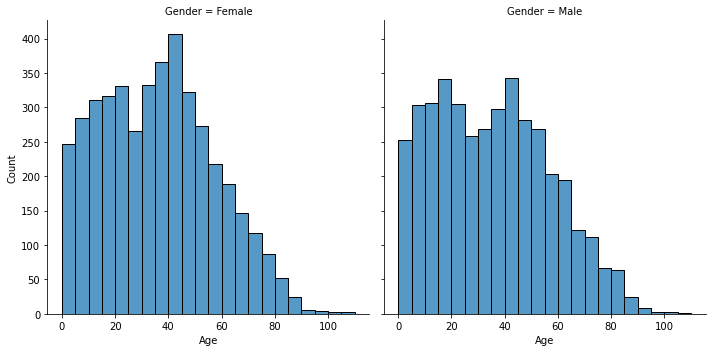

In [71]:
# Relationship between age and gender

# sns.set(font_scale=1.2)
plt.figure(figsize=(15,10))
sns.displot(census_df, x = "Age", col= "Gender", binwidth= 5)
plt.show()

# it can seen that the most females are between the age of 40-45
# while most the males are between the age of 15-20 and 40-45

# Task 1 and 2

### Plotting the Age Popultation Pyramid

In [72]:
# creating age range using the Age column

def agerange1(y):
    if y <= 4:
        return "0-4"
    if y <= 9:
        return "5-9"
    if y <= 14:
        return "10-14"
    if y <= 19:
        return "15-19"
    if y <= 24:
        return "20-24"
    if y <= 29:
        return "25-29"
    if y <= 34:
        return "30-34"
    if y <= 39:
        return "35-39"
    if y <= 44:
        return "40-44"
    if y <= 49:
        return "45-49"
    if y <= 55:
        return "50-54"
    if y <= 59:
        return "55-59"
    if y <= 64:
        return "60-64"
    if y <= 69:
        return "65-69"
    if y <= 74:
        return "70-74"
    if y <= 79:
        return "75-79"
    if y <= 84:
        return "80-84"
    if y <= 89:
        return "85-89"
    if y <= 94:
        return "90-94"
    if y <= 99:
        return "95-99"
    else:
        return "100+"   

In [73]:
# creating new column under the data frame

census_df["Age_Range"] = census_df["Age"].apply(agerange1)

In [74]:

male_population = census_df["Age_Range"][census_df.Gender == "Male"].value_counts().sort_index()
female_population = census_df["Age_Range"][census_df.Gender == "Female"].value_counts().sort_index()

# creating a new data frame for male, females and age range

age_df = pd.DataFrame({"Male": -1*male_population, "Female": female_population})
age_df.index.names = ["Age Range"]
age_df.reset_index(inplace= True)
age_list = ['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74', '65-69', 
            '60-64', '55-59', '50-54', '45-49', '40-44', '35-39', '30-34', 
            '25-29', '20-24', '15-19', '10-14', '5-9', '0-4']

In [75]:
age_df # checking the created data frame for age and gender

,Age Range,Male,Female
0,0-4,-253,247
1,10-14,-307,310
2,100+,-3,5
3,15-19,-341,316
4,20-24,-305,331
5,25-29,-259,266
6,30-34,-269,333
7,35-39,-297,366
8,40-44,-342,406
9,45-49,-282,322


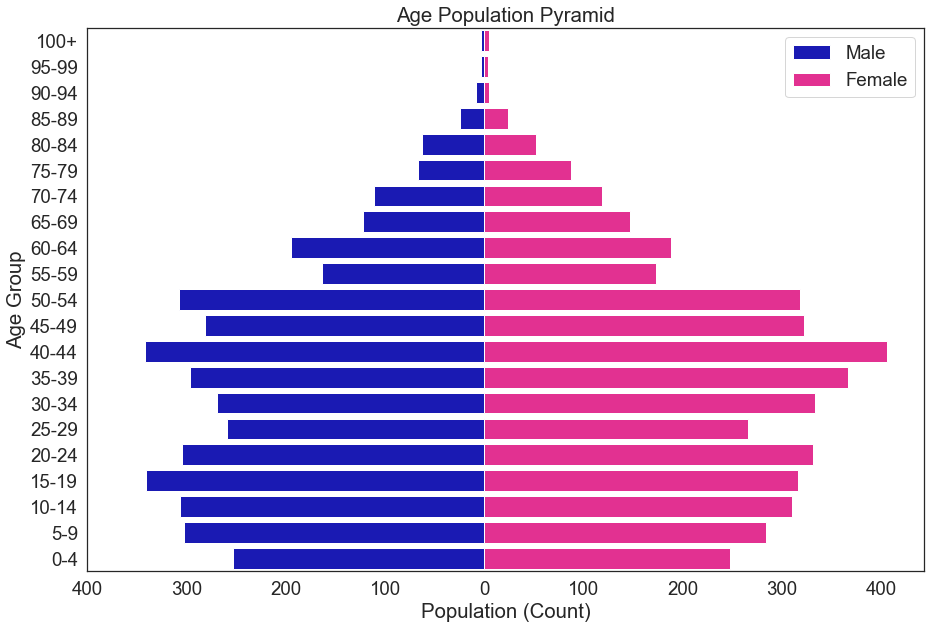

In [76]:
# ploting the age distribution pyramid

sns.set(font_scale=1.7)
sns.set_style("white")
plt.figure(figsize=(15,10))

population_pyranid = sns.barplot(data=age_df, x="Male", y="Age Range",
                                 order= age_list, color= ("mediumblue"), label= "Male")
population_pyranid= sns.barplot(data=age_df, x="Female", y="Age Range",
                               order=age_list, color=("deeppink"), label="Female")
plt.xticks([-400, -300, -200, -100, 0, 100, 200, 300, 400],[400, 300, 200, 100, 0, 100, 200, 300, 400])
population_pyranid.legend()
plt.title("Age Population Pyramid")
population_pyranid.set(xlabel= "Population (Count)", ylabel= "Age Group")
plt.savefig("Age Population P.png") # save plot

plt.show()


### Calculating the Annual Birth Rate Based on Fertility Rate Per 1000 women 
   ###### Assumptions 1. Average of Woman child bearing age range 18 - 45 (UK Statistics)
   ###### Assumption 2. Considering the number of children below one year 

In [77]:
age_0year_old = (census_df["Age"] == 0).sum() # Number of Children below one year old
age_4year_old = (census_df["Age"] == 4).sum() # Number of Children 4 years old
women15_45 = census_df[(census_df.Gender == "Female") & (census_df.Age.between(18, 45))].count()[0]

print("Age zero: ", age_0year_old)
print("Age Four: ", age_4year_old)
print("women between 15 ot 45 years: ", women15_45)

Age zero:  88
Age Four:  100
women between 15 ot 45 years:  1930


In [78]:
# Calculating fertility rate per 1,000 women

birth_rate_0yr = round((age_0year_old/women15_45)*1000)
birth_rate_4yr = round((age_4year_old/women15_45)*1000)

print(f" The birth rate base on fertility for present year is : {birth_rate_0yr} per 1000 Females")
print(f" The birth rate base on fertility five years ago is : {birth_rate_4yr} per 1000 Females")

 The birth rate base on fertility for present year is : 46 per 1000 Females
 The birth rate base on fertility five years ago is : 52 per 1000 Females


### Calculating the Annual Crude Birth Rate

In [79]:
age_0year_olds = (census_df["Age"] == 0).sum() # for age 0 years

In [80]:
len(census_df)

8329

In [81]:
crude_birthrate_0yrs = round(age_0year_olds/len(census_df)*1000)
print(f" The crude birth rate age 0 is : {crude_birthrate_0yrs} per 1000 population")

 The crude birth rate age 0 is : 11 per 1000 population


### Evolving Birth Rate

In [82]:
age_4year_olds = (census_df["Age"] == 4).sum() # for age 4 years
age_9year_olds = (census_df["Age"] == 9).sum() # for age 9 years

crude_birthrate_4yrs = round(age_4year_olds/len(census_df)*1000)
crude_birthrate_9yrs = round(age_9year_olds/len(census_df)*1000)

In [83]:
print(f" The crude birth rate age four is : {crude_birthrate_4yrs} per 1000 population")
print(f" The crude birth rate age nine is : {crude_birthrate_9yrs} per 1000 population")

 The crude birth rate age four is : 12 per 1000 population
 The crude birth rate age nine is : 14 per 1000 population


In [84]:
crude_birthrate_4yrs



12

### Calculating Annual Crude Death Rate Per 1,000 people
##### Assumption 1. Using age between 50 to 100+,
#### Assumption 2. Using 5 years interval
#### Base on natural death by age

In [85]:
# calcuating death rate using the age interval of 5years between 50-59 and 60-69 years

age_60_64 = census_df[census_df["Age_Range"]=="60-64"].count()
age_65_69 = census_df[census_df["Age_Range"]=="65-69"].count()

# Calculating total count difference between the age range
mid_old_age = [abs(age_65_69["Age"]-age_60_64["Age"])]

# Calculating the Annual crude death rate based on 5 years interval
crude_deathrate60_69 = round(sum(mid_old_age)/(len(census_df)*5)*1000)

# print result
print(f" Annual crude death rate base on 60 to 69 years  is : {crude_deathrate60_69} per 1000 population")

 Annual crude death rate base on 60 to 69 years  is : 3 per 1000 population


### Evolving Crude Death Rate

In [86]:
# Calculation the counts of different age arnge with 5 years interval for 70 to 79 years

age_70_74 = census_df[census_df["Age_Range"]=="70-74"].count()
age_75_79 = census_df[census_df["Age_Range"]=="75-79"].count()


# Calculating total count difference between the age range
old_age = [abs(age_75_79["Age"]),abs(age_75_79["Age"]-age_70_74["Age"])]

# Calculating the Annual crude death rate based on 5 years interval

crude_deathrate70_79 = round(sum(old_age)/(len(census_df)*5)*1000)


print(f" Annual crude death rate  is : {crude_deathrate70_79} per 1000 population")

 Annual crude death rate  is : 5 per 1000 population


In [87]:
# Calculation the counts of different age arnge with 5 years interval for 80 years plus

age_80_84 = census_df[census_df["Age_Range"]=="80-84"].count()
age_85_89 = census_df[census_df["Age_Range"]=="85-89"].count()
age_90_94 = census_df[census_df["Age_Range"]=="90-94"].count()
age_95_99 = census_df[census_df["Age_Range"]=="95-99"].count()
age_100_plus = census_df[census_df["Age_Range"]=="100+"].count()

# Calculating the Annual crude death rate based on 5 years interval
very_old_age = [abs(age_100_plus["Age"]-age_95_99["Age"]),abs(age_95_99["Age"]-age_90_94["Age"]),abs(age_90_94["Age"]-age_85_89["Age"]),abs(age_85_89["Age"]-age_80_84["Age"]),abs(age_80_84["Age"])]
crude_deathrate80_plus = round(sum(very_old_age)/(len(census_df)*5)*1000)

#print result
print(f" Annual crude birth rate  is : {crude_deathrate80_plus} per 1000 population")

 Annual crude birth rate  is : 5 per 1000 population


## Marital Status Analysis

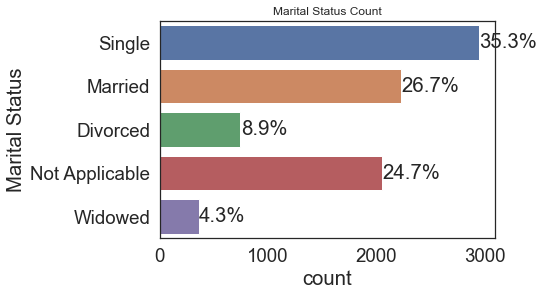

In [88]:
# Count plot of Marital Status, showing the percenatges

ax = sns.countplot(data=census_df, y="Marital Status")

n_obs = census_df.shape[0]
for p in ax.patches:
    width = p.get_width()
    percentage = '{:.1f}%'.format(100 * width / n_obs)
    x = x = width + 3
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va="center")
ax.set_title("Marital Status Count", fontsize=12)    


plt.show()


### Marital Status Correlation with Age

In [89]:
census_df[["Age", "Marital Status"]].groupby("Marital Status").describe()    # age distribution of marital status

Age                                                     
                 count       mean        std   min   25%   50%   75%    max
Marital Status                                                             
Divorced         744.0  40.983871  16.728044  18.0  28.0  39.0  50.0  102.0
Married         2226.0  50.314915  15.961305  16.0  38.0  49.0  62.0  106.0
Not Applicable  2056.0   8.845817   5.053973   0.0   5.0   9.0  13.0   17.0
Single          2943.0  37.691471  14.153906  18.0  25.0  37.0  48.0   97.0
Widowed          360.0  62.061111  20.374943  18.0  45.0  68.0  76.0  105.0

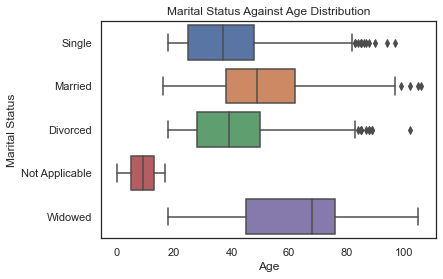

In [90]:
# box plot of marital status against age
plt.figure(figsize=(6,4))
sns.set(font_scale=1.2)
sns.set_theme()
sns.set_style("white")
sns.boxplot(y= "Marital Status", x= "Age", data= census_df).set(title= "Marital Status Against Age Distribution")

plt.savefig("Marital status boxplot.png")
plt.show()

### Calculating Divorce Rate and Marriage Rate by Gender (...to determine likely Emmigrant and Housing Need)

In [91]:
divorced = census_df[(census_df["Marital Status"]== "Divorced")]

In [92]:
# checking the total number of male and female who are divorced

divorced_male = census_df[(census_df["Marital Status"]== "Divorced") & (census_df["Gender"]== "Male")].count()[0]
divorced_female = census_df[(census_df["Marital Status"]== "Divorced") & (census_df["Gender"]== "Female")].count()[0]

In [93]:
print(f" Number of Divorce Males : {divorced_male}")
print(f" Number of Divorce Famales : {divorced_female}")

 Number of Divorce Males : 299
 Number of Divorce Famales : 445


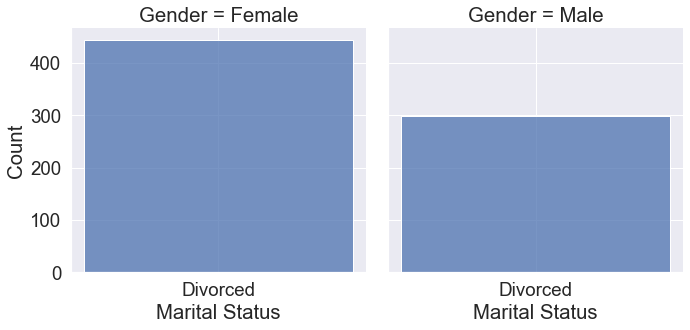

<Figure size 1080x720 with 0 Axes>

In [102]:
# plot devorce based on gender count

divorced_gender = sns.displot(data=divorced, x= "Marital Status",  col="Gender")



sns.set_style("white")
sns.set(font_scale=1.7)
plt.figure(figsize=(15,10))
plt.show()

In [103]:
married_count = census_df[(census_df["Marital Status"]=="Married")].count()[0]

In [104]:
divorced_count = census_df[(census_df["Marital Status"]== "Divorced")].count()[0]

In [105]:
marriage_rate = round(((married_count)/len(census_df))*1000)
divorced_rate = round(((divorced_count)/len(census_df))*1000)

In [106]:
print(f" Divorce Rate : {divorced_rate: .2f} per 1000 population")
print(f" Marriage Rate : {marriage_rate: .2f} per 1000 population")

 Divorce Rate :  89.00 per 1000 population
 Marriage Rate :  267.00 per 1000 population


## Occupation Data Analysis (...to determine likely age to be unemployed and potential commuters)

### Relationship between Unempoyment by Gender

In [107]:
# cheching the count of all unemployed individuals in the data set

unemployed = census_df.loc[census_df["Occupation"] == "Unemployed"]

In [108]:
len(unemployed)

476

<Figure size 1080x720 with 0 Axes>

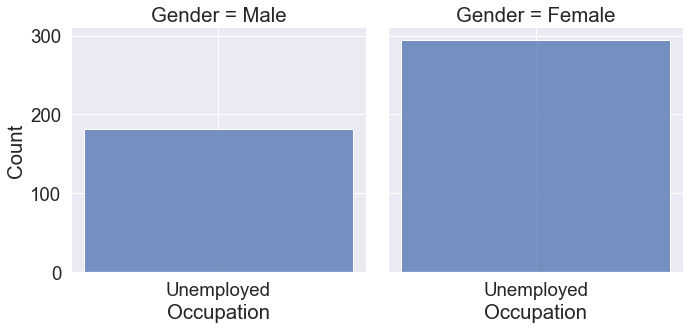

In [109]:
# ploting unemployment by gender
sns.set_style("white")
sns.set(font_scale=1.7)
plt.figure(figsize=(15,10))
occupation_gender = sns.displot(data=unemployed, x= "Occupation", col= "Gender")



plt.show()

### Calculating Crude and  Actual Unemployment Rate
#### Assumptions 1: Official employment age 16 years to 65 years


In [110]:
total_workforce = (census_df["Age"].between(16, 65)).sum()
total_workforce

5726

In [111]:
percenatge_of_workforce = round(((total_workforce)/len(census_df))*100)
workforce_per1000 = round(((total_workforce)/len(census_df))*1000)
print(f" Percenatge of Employable Population : {percenatge_of_workforce: .2f}% of population")
print(f" Percenatge of Employable Population : {workforce_per1000: .2f} of 1000 population")

 Percenatge of Employable Population :  69.00% of population
 Percenatge of Employable Population :  687.00 of 1000 population


In [112]:
# calculating unemployement rate

c_unemployment_rate = round((len(unemployed)/len(census_df))*1000)
a_unemployment_rate = (len(unemployed)/(total_workforce))*100


# print the results
print(f" Crude Unemployment Rate : {c_unemployment_rate: .2f} per 1000 population")
print(f" Actual Unemployment Rate : {a_unemployment_rate: .2f}% of the Workforce")

 Crude Unemployment Rate :  57.00 per 1000 population
 Actual Unemployment Rate :  8.31% of the Workforce


### Calculating  Number of Commutters

In [113]:
# Since the town has not university, no train station and inveriablilty no airport also)
# checking all the possible commuters, all those whose activiteis involves travelling outside the town
# This include all university studends, all university workers, all those who work as airport and train station are also considered as comutters 

oc = census_df["Occupation"].unique()
print(oc)

['Engineer, building services' 'Engineer, mining' 'Retired' ...
 'Retired Multimedia programmer' 'Retired Commercial/residential surveyor'
 'Retired Control and instrumentation engineer']


In [114]:
# Replacing all retired work positon with "retired"
census_df.loc[census_df["Occupation"].str.startswith("Retired"), "Occupation"] = "Retired"

In [115]:
census_df.loc[census_df["Occupation"] == "Child", "Occupation"]= "Child"
census_df.loc[census_df["Occupation"] == "Unemployed", "Occupation"]= "Unemployed"
census_df.loc[census_df["Occupation"] == "Child psychotherapist", "Occupation"]= "Employed"
census_df.loc[census_df["Occupation"].str.contains("Retired"), "Occupation"] = "Retired"
census_df.loc[census_df.Occupation.str.contains("Air|Professor|Air|lecturer|Academic|University Student|PhD Student"), "Occupation"] = "Commuter"
census_df.loc[~ census_df["Occupation"].str.contains("Student|Unemployed|Retired|Child|Child psychotherapist|Commuter"), "Occupation"] = "Employed"

In [116]:
occupation_values = census_df["Occupation"].value_counts().rename_axis("Occupations").reset_index(name="Values")
occupation_values

,Occupations,Values
0,Employed,4348
1,Student,1669
2,Retired,693
3,Commuter,643
4,Child,500
5,Unemployed,476


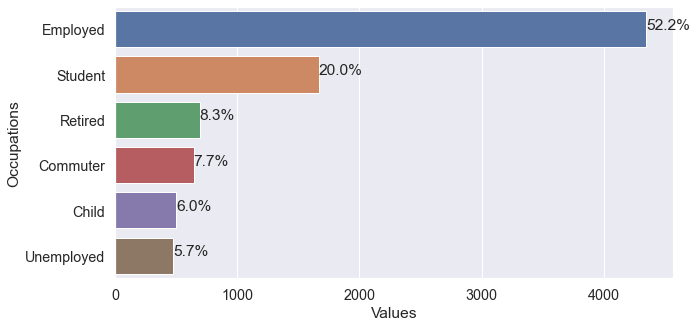

In [117]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.set(font_scale=1.3)
ax = sns.barplot(data=occupation_values, y="Occupations", x="Values")
total = occupation_values["Values"].sum()
for p in ax.patches:
    percentage = "{:.1f}%".format((p.get_width()/total)*100)
    x= p.get_x() + p.get_width() + 0.02
    y= p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))

plt.show()

In [118]:
census_df1 = census_df.copy()

In [119]:
census_df[["Age", "Occupation"]].groupby("Occupation").describe()

Age                                                      
             count       mean        std   min    25%   50%   75%    max
Occupation                                                              
Child        500.0   2.098000   1.377022   0.0   1.00   2.0   3.0    4.0
Commuter     643.0  22.959565   8.200272  18.0  19.00  21.0  22.0   65.0
Employed    4348.0  42.854416  12.015909  19.0  33.00  42.0  52.0   71.0
Retired      693.0  76.089466   7.034849  66.0  70.00  74.0  80.0  106.0
Student     1669.0  11.485321   3.991064   5.0   8.00  11.0  15.0   18.0
Unemployed   476.0  41.819328  10.803748  22.0  33.75  41.0  50.0   65.0

## Migration (Immigration and Emmigration)

#### Calculating Immigrants (Total Number of Lodgers and Visitors in the Town)

In [120]:
print(census_df["Relationship to Head of House"].unique())

['Head' 'Partner' 'Husband' 'Son' 'None' 'Daughter' 'Wife' 'Grandson'
 'Lodger' 'Visitor' 'Cousin' 'Step-Son' 'Sibling' 'Granddaughter'
 'Step-Daughter' 'Adopted Son' 'Nephew' 'Adopted Daughter' 'Son-in-law'
 'Neice' 'Daughter-in-law' 'Adopted Grandson' 'Adopted Granddaughter']


In [121]:
# University students and PhD student constitute most of the immigration and emmigration in the town
# Also those who are divorced who have lift the town can be considered as emmigrants
# Visitors and Logders who are not divorced are considered as immigrants

In [122]:
#calculating number of immigrants per 1000 population

immigrants = census_df[(~(census_df["Marital Status"] == "Divorced")) & 
                       (census_df["Relationship to Head of House"].str.contains("Lodger|Visitor"))].count()[0]

immigrants_per1000 = round(immigrants/(len(census_df))*1000)
print("Number of Immigrants: ",immigrants)
print(f" Number of Immigrants : {immigrants_per1000} per 1000 population")

Number of Immigrants:  339
 Number of Immigrants : 41 per 1000 population


 #### Calculating Emmigrants (Total Number of student who have left the town)

In [123]:
emmigrants = census_df[(census_df["Occupation"]== "University Student") | (census_df["Occupation"]== "PhD Student")].count()[0]

#percentage of emmirants
emmigrants_per1000 = round(emmigrants/(len(census_df))*1000)
print(" Number of Emmigrants: ",emmigrants)
print(f" Number of Emmigrants : {emmigrants_per1000} per 1000 population")

 Number of Emmigrants:  0
 Number of Emmigrants : 0 per 1000 population


In [124]:
# Calculating Emmigrants due to Divorce

print(f" Number of Divorce Males : {divorced_male}")
print(f" Number of Divorce Famales : {divorced_female}")

 Number of Divorce Males : 299
 Number of Divorce Famales : 445


In [125]:
# calculating the total emmigrante due to divorce

emmigrants_divorced = (divorced_female - divorced_male)
emmigrants_divorced_per1000 = round((emmigrants_divorced/len(census_df))*1000)
print(emmigrants_divorced)
print(f"Number of Emmigrants : {emmigrants_divorced_per1000} per 1000 population")

146
Number of Emmigrants : 18 per 1000 population


## Calculating Total Occupant in Each Household (...checking the rate of house useage)

In [126]:
Occupants_per_house = census_df.groupby(["Street", "House Number"]).size().reset_index(name="Number of Occupants")
Occupants_per_house.head()

,Street,House Number,Number of Occupants
0,Alba Crescent,1,2
1,Alba Crescent,2,1
2,Alba Crescent,3,1
3,Alba Crescent,4,1
4,Alba Crescent,5,2


In [127]:
# Calculation the total number of occupants base on the number of persons in each household

Occupancy_count = Occupants_per_house["Number of Occupants"].value_counts().rename_axis("Household Occupancy").reset_index(name="Counts")
Occupancy_count.sort_values(by=["Household Occupancy"])

,Household Occupancy,Counts
1,1,697
0,2,725
3,3,446
2,4,479
4,5,313
5,6,80
6,7,21
10,8,9
11,9,9
8,10,10


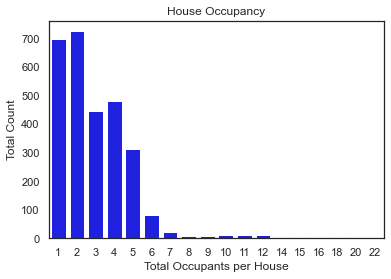

In [128]:
# Ploting Occupancy Rate
sns.set_theme()
sns.set_style("white")
# plt.figure(figsize=(6,4))
occupancy_rate = sns.barplot(data=Occupancy_count, x="Household Occupancy", y="Counts", color="blue").set(title="House Occupancy", xlabel="Total Occupants per House", ylabel="Total Count")
plt.show()

# Further Calculation for recommendation

### Calculating Total Number of Older Age Population (75 years ) Who might need care in the Future 

In [132]:
age_75_100plus = census_df.loc[census_df["Age"] >=75].count()[0]
age_75_100plus_per = (age_75_100plus/len(census_df))*100

print(f" People of Care need: {age_75_100plus: .2f}")
print(f" People of Care need: {age_75_100plus_per: .2f}%")

 People of Care need:  346.00
 People of Care need:  4.15%
